<font color="#3D2FB2 " FACE="futura" size =6> **PREDICCIÓN DE PRECIO DE APARTAMENTOS** </font>

<font color="#3D2FB2 " FACE="futura" size =5> **Objetivo**</font>

---

El objetivo del proyecto es obtener la predicción de precios de apartamentos en la Ciudad de Bogotá, Colombia.


El dataset se tomo de la página de kaggle que puede se encontrado en el siguinte link:        

https://www.kaggle.com/datasets/erik172/bogota-apartments/code



El dataset cuenta con 63,245 registros, lo cuales están divididos en 38 columnas que cuentan con la siguiente información:

| Columna | Descripción |
|----------|----------|
| codigo   | Código único que identifica cada apartamento  |
| tipo_propiedad   | 	Tipo de propiedad (apartamento, casa, etc.) |
| tipo_operacion    | Tipo de operación (venta, arriendo, etc.)   |
| precio_venta   | Precio de venta del apartamento COP |
| precio_arriendo   | Precio de arriendo del apartamento COP  |
| area   | Área del apartamento en metros cuadrados   |
| habitaciones   | Número de habitaciones del apartamento   |
| banos    | 	Número de baños del apartamento  |
| administracion    | Valor de la cuota de administración del apartamento  |
| parqueaderos   | Número de parqueaderos disponibles   |
| sector    | Sector o zona en la que se encuentra el apartamento   |
| estrato    | Estrato socioeconómico del apartamento  |
| antiguedad   | Antigüedad del apartamento en años   |
| estado    | Estado del apartamento (nuevo, usado)   |
| longitud    | Longitud geográfica del apartamento   |
| latitud  | Latitud geográfica del apartamento   |
| descripcion    | Descripción detallada del apartamento  |
| datetime    | Fecha y hora de extracción de los datos   |
| jacuzzi   | Indica si el apartamento cuenta con jacuzzi   |
| piso    | Número de piso en el que se encuentra el apartament   |
| closets    | Número de closets en el apartamento   |
| chimenea   | Indica si el apartamento cuenta con chimenea   |
| permite_mascotas    | 	Indica si se permiten mascotas en el apartamento   |
| gimnasio    | Indica si el apartamento cuenta con gimnasio   |
| ascensor    | Indica si el edificio cuenta con ascensor   |
| conjunto_cerrado    | Indica si el apartamento se encuentra en conjunto cerrado   |
| coords_modified    | CCoordenadas modificadas del apartamento   |
| localidad    | Localidad en la que se encuentra el apartamento   |
| barrio    | Barrio en el que se encuentra el apartamento   |
| estacion_tm_cercana    | Nombre de la estacion de transporte masivo mas cercana   |
| distancia_estacion_tm_m    | Distancia a la estación de transporte masivo más cercana   |
| is_cerca_estacion_tm    | Indica si está cerca de una estación de transporte masivo   |



#<font color="#3D2FB2 " FACE="futura" size =6> Extracción de datos

**Instalación e importación de dependencias**

In [1]:

# commands to install packages
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install -U seaborn



In [2]:
# !pip3 install -U scikit-learn 

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Expand information
pd.set_option('display.max_columns', None)

In [5]:
apartments = pd.read_csv('apartments.csv')
apartments.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,estado,longitud,latitud,descripcion,datetime,website,compañia,fecha_actualizacion_precio_venta,precio_venta_anterior,fecha_actualizacion_precio_arriendo,precio_arriendo_anterior,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
0,374-M2718950,APARTAMENTO,VENTA Y ARRIENDO,2.500000e+09,13500000.0,320.0,4.0,5.0,2500000.0,3.0,COUNTRY,6.0,MAS DE 20 ANOS,USADO,-74.026855,4.715475,"vendo o arriendo ph duplex montearroyo, 320 mt...",2023-06-19 05:43:49.763,metrocuadrado.com,LIDIS MACIAS,NaN,NaN,NaN,NaN,1,8.0,4.0,1,1,1,1,1,False,USAQUEN,CIUDADELA REAL,Alcalá,2798.74,0
1,2510-M4156145,APARTAMENTO,VENTA,4.850000e+08,NaN,84.0,3.0,3.0,680000.0,1.0,SANTA BARBARA,6.0,MAS DE 20 ANOS,USADO,-74.045900,4.694500,"oportunidad, bonito apartamento, recien refacc...",2023-06-19 05:43:53.411,metrocuadrado.com,JM GESTIONES INMOBILIARIAS,NaN,NaN,NaN,NaN,0,2.0,3.0,0,0,0,1,1,False,USAQUEN,SAN PATRICIO,Pepe Sierra,1135.12,0
2,10312-M2873283,APARTAMENTO,VENTA Y ARRIENDO,1.980000e+09,9000000.0,248.0,3.0,3.0,2200000.0,3.0,SANTA BARBARA,6.0,MAS DE 20 ANOS,USADO,-74.027916,4.690854,presentamos espectacular apartamento en uno de...,2023-06-19 05:43:58.765,metrocuadrado.com,PENTAGOLD,NaN,NaN,NaN,NaN,0,3.0,NaN,1,1,0,1,1,False,USAQUEN,CERROS DE SANTA BARBARA,Calle 106,3138.91,0
3,10139-M4343016,APARTAMENTO,VENTA,4.950000e+08,NaN,77.2,3.0,2.0,367000.0,1.0,COLINA Y ALREDEDORES,4.0,ENTRE 5 Y 10 ANOS,USADO,-74.056400,4.742382,"lindo apartamento, con 3 habitaciones 2 banos,...",2023-06-19 05:44:02.598,metrocuadrado.com,DIANA RODRIGUEZ FERNANDEZ,NaN,NaN,NaN,NaN,0,2.0,3.0,0,1,1,1,1,False,SUBA,CAMPOS DE SILENCIO,Cardio Infantil,936.00,0
4,10139-M3692828,APARTAMENTO,VENTA,1.570000e+09,NaN,213.0,3.0,4.0,994000.0,3.0,COUNTRY,3.0,ENTRE 5 Y 10 ANOS,USADO,-74.028244,4.708852,vendo o arriendo iraka t 4 apto 201 213m mas ...,2023-06-19 05:44:06.286,metrocuadrado.com,DIANA RODRIGUEZ FERNANDEZ,NaN,NaN,NaN,NaN,0,4.0,NaN,0,0,1,1,1,False,USAQUEN,GINEBRA,Prado Veraniego,2766.29,0


In [6]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63245 entries, 0 to 63244
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   codigo                               63245 non-null  object 
 1   tipo_propiedad                       63245 non-null  object 
 2   tipo_operacion                       63245 non-null  object 
 3   precio_venta                         44405 non-null  float64
 4   precio_arriendo                      19702 non-null  float64
 5   area                                 63243 non-null  float64
 6   habitaciones                         63237 non-null  float64
 7   banos                                63239 non-null  float64
 8   administracion                       51342 non-null  float64
 9   parqueaderos                         63237 non-null  float64
 10  sector                               60238 non-null  object 
 11  estrato                     

In [7]:
#Dimensiones del dataset
apartments.shape

(63245, 38)

In [8]:
apartments.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'descripcion', 'datetime', 'website', 'compañia',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm'],
      dtype='object')

#<font color="#3D2FB2 " FACE="futura" size =6> Valores faltantes y valores duplicados

De lo anterior solo tomaremos algunas de las columnas para poder introducir al modelo. Se realizara un análisis de estas variables en cuanto a valores faltantes y duplicados

In [9]:
## Selección de columnas para la predicción
apartments= apartments[['precio_venta','area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'estrato', 'antiguedad',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor']]

In [10]:
""""

Esta función calcula la cantidad de valores nulos de las columnas del dataset
tambien devuelve el porcentaje de datos faltantes por variable

"""
def calcular_porcentaje_faltantes(data):

    na = pd.DataFrame(data.isna().sum(), columns = ['na'])
    na = na[na.na >0]  ## Filtra las variables que tienen valores faltantes
    na['Porcentaje'] = (na/len(data))*100 # Calcula el porcentaje de valores faltantes
    na = na.rename(columns = {'na':'Total de faltantes'})
    return na

In [11]:
## Verificamos cantidad de valores faltantes
calcular_porcentaje_faltantes(apartments)

,Total de faltantes,Porcentaje
precio_venta,18840,29.788916
area,2,0.003162
habitaciones,8,0.012649
banos,6,0.009487
administracion,11903,18.820460
parqueaderos,8,0.012649
estrato,20,0.031623
antiguedad,28,0.044272
piso,28123,44.466756
closets,39739,62.833426


Debido al alto número de valores faltantes  precindiremos de las columnas 'piso' y closets

In [12]:
apartments.drop(columns = ['piso', 'closets'], axis= 1, inplace= True)

Tambien eliminaremos los valores de la columna 'precio de venta', ya que porcentaje de valore faltantes es alto y no se imputaran datos, debido a que esto podría afectar la distribución original de nuestros datos.


In [13]:
apartments = apartments.dropna(subset=['precio_venta'])

In [14]:
## Verificando el número de valores faltantes
calcular_porcentaje_faltantes(apartments)

,Total de faltantes,Porcentaje
area,1,0.002252
habitaciones,3,0.006756
banos,3,0.006756
administracion,4386,9.877266
parqueaderos,5,0.011260
estrato,17,0.038284
antiguedad,25,0.056300


Obseravaremos los estadíticos de nuestros datos y detectar outliers y las posibles distribuiones en nuetsros datos.

In [15]:
## Verificaremos los estadísticos de las variables
apartments.describe()

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,jacuzzi,chimenea,permite_mascotas,gimnasio,ascensor
count,4.440500e+04,44404.000000,44402.000000,44402.000000,4.001900e+04,44400.000000,44388.000000,44405.000000,44405.000000,44405.000000,44405.000000,44405.000000
mean,1.510209e+09,141.671293,2.709045,2.756835,4.093754e+06,1.688356,4.798549,0.047067,0.353789,0.027182,0.324265,0.605788
std,3.769809e+10,810.098520,0.785188,1.139289,6.752746e+07,1.028248,1.236754,0.211784,0.478150,0.162614,0.468105,0.488686
min,2.450000e+05,0.000000,1.000000,-3.000000,1.960000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.700000e+08,67.000000,2.000000,2.000000,3.000000e+05,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.100000e+08,100.000000,3.000000,3.000000,5.470000e+05,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.185000e+09,168.000000,3.000000,4.000000,9.910000e+05,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,4.250000e+12,113000.000000,8.000000,5.000000,3.800000e+09,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Eliminamos valores duplicados en el dataset

In [16]:
# Verificamos si no hay valores duplicado
apartments.duplicated().sum()

5451

In [17]:
apartments[apartments.duplicated()].head(5)

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,antiguedad,jacuzzi,chimenea,permite_mascotas,gimnasio,ascensor
102,1.400000e+09,189.0,2.0,3.0,600000.0,3.0,6.0,ENTRE 0 Y 5 ANOS,0,1,0,1,1
373,1.400000e+09,189.0,2.0,3.0,600000.0,3.0,6.0,ENTRE 0 Y 5 ANOS,0,1,0,1,1
383,1.400000e+09,189.0,2.0,3.0,600000.0,3.0,6.0,ENTRE 0 Y 5 ANOS,0,1,0,1,1
405,5.900000e+08,91.4,3.0,2.0,520000.0,1.0,5.0,MAS DE 20 ANOS,0,0,0,1,1
413,5.200000e+08,67.0,1.0,2.0,480000.0,1.0,4.0,ENTRE 5 Y 10 ANOS,0,0,0,0,1


In [18]:
## Eliminamos valores duplicados
apartments.drop_duplicates(inplace=True)

In [19]:
apartments.shape

(38954, 13)

Realizaremos la imputación de datos en la variable administración con el valore de la media.

In [20]:
apartments['administracion'].mean()

4490972.773549898

In [21]:
apartments['administracion'].fillna(4490972.77, inplace = True)

In [22]:
## Verificamos cantidad de valores faltantes
calcular_porcentaje_faltantes(apartments)

,Total de faltantes,Porcentaje
area,1,0.002567
habitaciones,3,0.007701
banos,3,0.007701
parqueaderos,5,0.012836
estrato,17,0.043641
antiguedad,25,0.064178


In [23]:
# Eliminamos los valores faltantes de las demas columnas
apartments= apartments.dropna()

De lo anterior, ya no contamos con valores faltantes en nuestros datos. Por lo que comenzaremos a realizar el análisis univariable de las variables que se pueden ingresar al modelo.

#<font color="#3D2FB2 " FACE="futura" size =6>  Análisis de variables

Realizamos el análisis de outliers

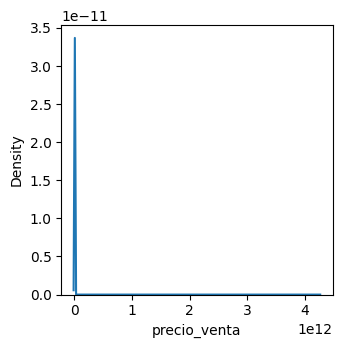

In [24]:
## Graficamos para detectar el tipo de distribución de nuestros datos.
plt.figure(figsize = (3.5,3.5))
sns.kdeplot(apartments['precio_venta'] )
plt.show()


Se encuentra sesgada positivamente. Graficaremos con boxplot para detectar outliers.

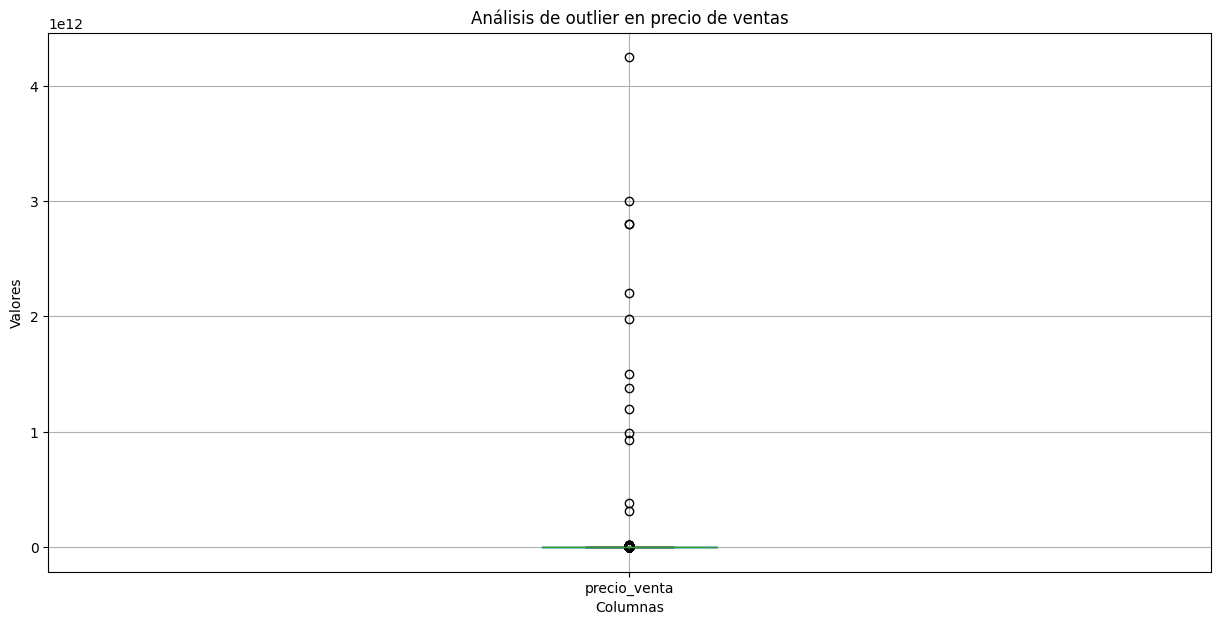

In [25]:
## Creando boxplot con matplotlib
plt.figure(figsize = (15,7))
apartments.boxplot(column =['precio_venta'])
plt.title ('Análisis de outlier en precio de ventas')
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.show()

In [26]:
## Para eliminar datos
## calculo del rango intercuartilico
Q1 = apartments['precio_venta'].quantile(0.25)  # Primer cuartil (25%)
Q3 = apartments['precio_venta'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1

# Definir los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para excluir outliers
apartments = apartments[(apartments['precio_venta'] >= limite_inferior) & (apartments['precio_venta'] <= limite_superior)]

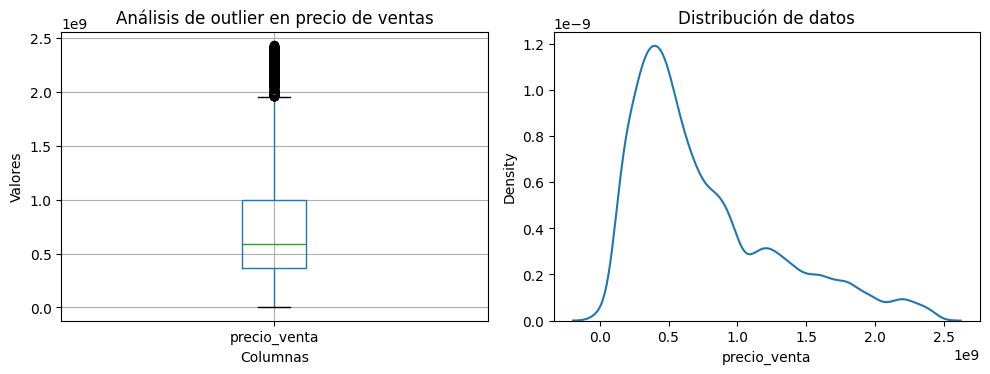

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


# Gráfico de boxplot en la primera subtrama (axes[0])
apartments.boxplot(column=['precio_venta'], ax=axes[0])
axes[0].set_title('Análisis de outlier en precio de ventas')
axes[0].set_ylabel('Valores')
axes[0].set_xlabel('Columnas')

# Gráfico de densidad (kdeplot) en la segunda subtrama (axes[1])
sns.kdeplot(apartments['precio_venta'], ax=axes[1])
axes[1].set_title('Distribución de datos')

# Ajustar espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

Realziaremos el mismo procedimiento para la columna área

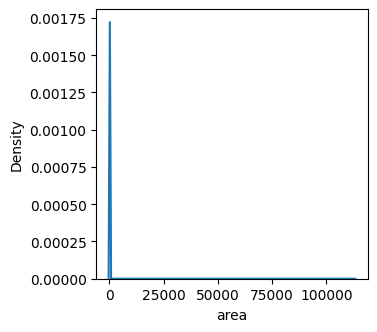

In [28]:
## Graficamos para detectar el tipo de distribución de nuestros datos.
plt.figure(figsize = (3.5,3.5))
sns.kdeplot(apartments['area'] )
plt.show()

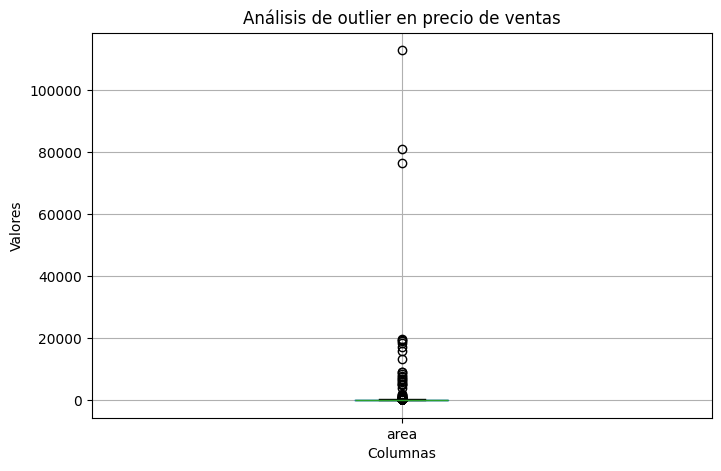

In [29]:
## Creando boxplot con matplotlib
plt.figure(figsize = (8,5))
apartments.boxplot(column =['area'])
plt.title ('Análisis de outlier en precio de ventas')
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.show()

In [30]:
## Para eliminar datos
## calculo del rango intercuartilico
Q1 = apartments['area'].quantile(0.25)  # Primer cuartil (25%)
Q3 = apartments['area'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1

# Definir los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para excluir outliers
apartments = apartments[(apartments['area'] >= limite_inferior) & (apartments['area'] <= limite_superior)]

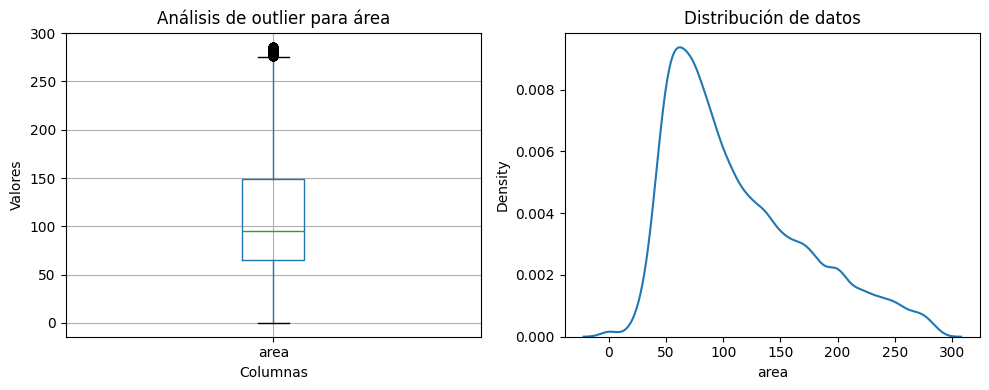

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


# Gráfico de boxplot en la primera subtrama (axes[0])
apartments.boxplot(column=['area'], ax=axes[0])
axes[0].set_title('Análisis de outlier para área')
axes[0].set_ylabel('Valores')
axes[0].set_xlabel('Columnas')

# Gráfico de densidad (kdeplot) en la segunda subtrama (axes[1])
sns.kdeplot(apartments['area'], ax=axes[1])
axes[1].set_title('Distribución de datos')

# Ajustar espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

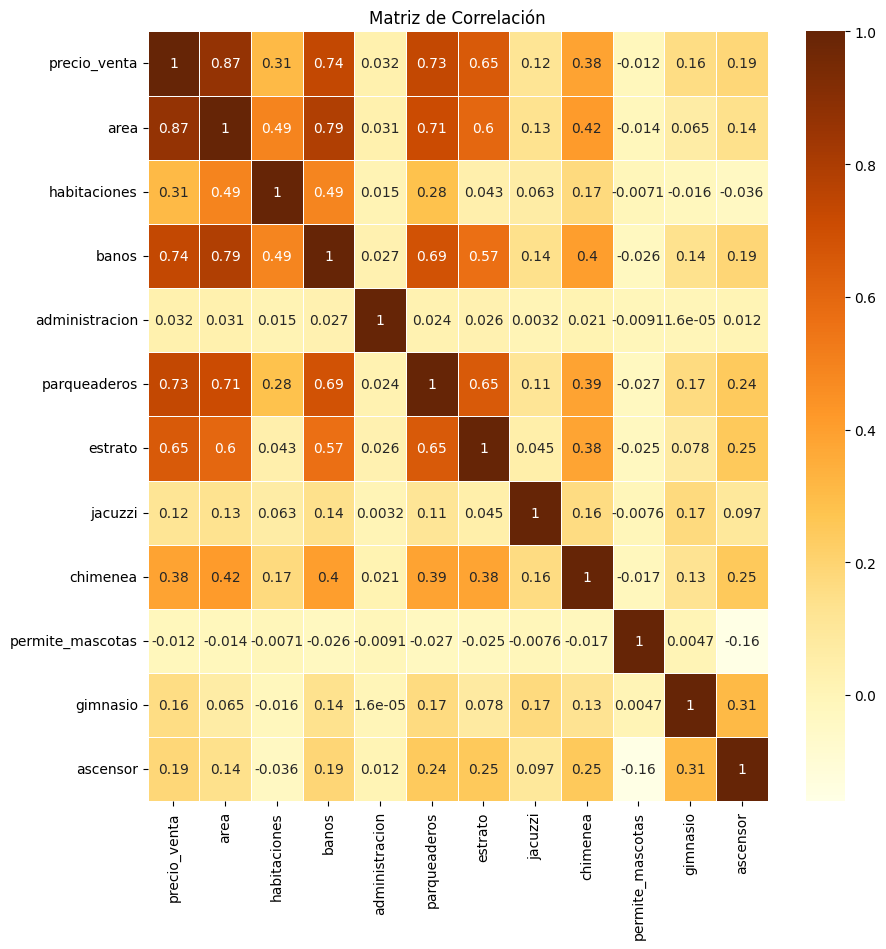

In [32]:
# Realizaremos la matriz de correlación para e análisis de los datos.
# Generando la matriz de correlación
corr_num = apartments[['precio_venta', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'estrato', 'jacuzzi', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor']]
plt.figure(figsize=(10, 10))  # ajusta el tamaño de la figura
sns.heatmap(corr_num .corr(), annot = True, cmap= 'YlOrBr', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Observamos que el precio de venta de tiene una alta correlación con el área del departamento, el número de baños,el número de habitaciones, el estrato económico y el número de parquedero.

In [33]:
apartments.columns

Index(['precio_venta', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'estrato', 'antiguedad', 'jacuzzi', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor'],
      dtype='object')

In [34]:
## Seleccionamos las variables antes mencionadas para analizar la relación entre estas variables

model =apartments[['precio_venta', 'area', 'habitaciones', 'banos','parqueaderos', 'estrato']]

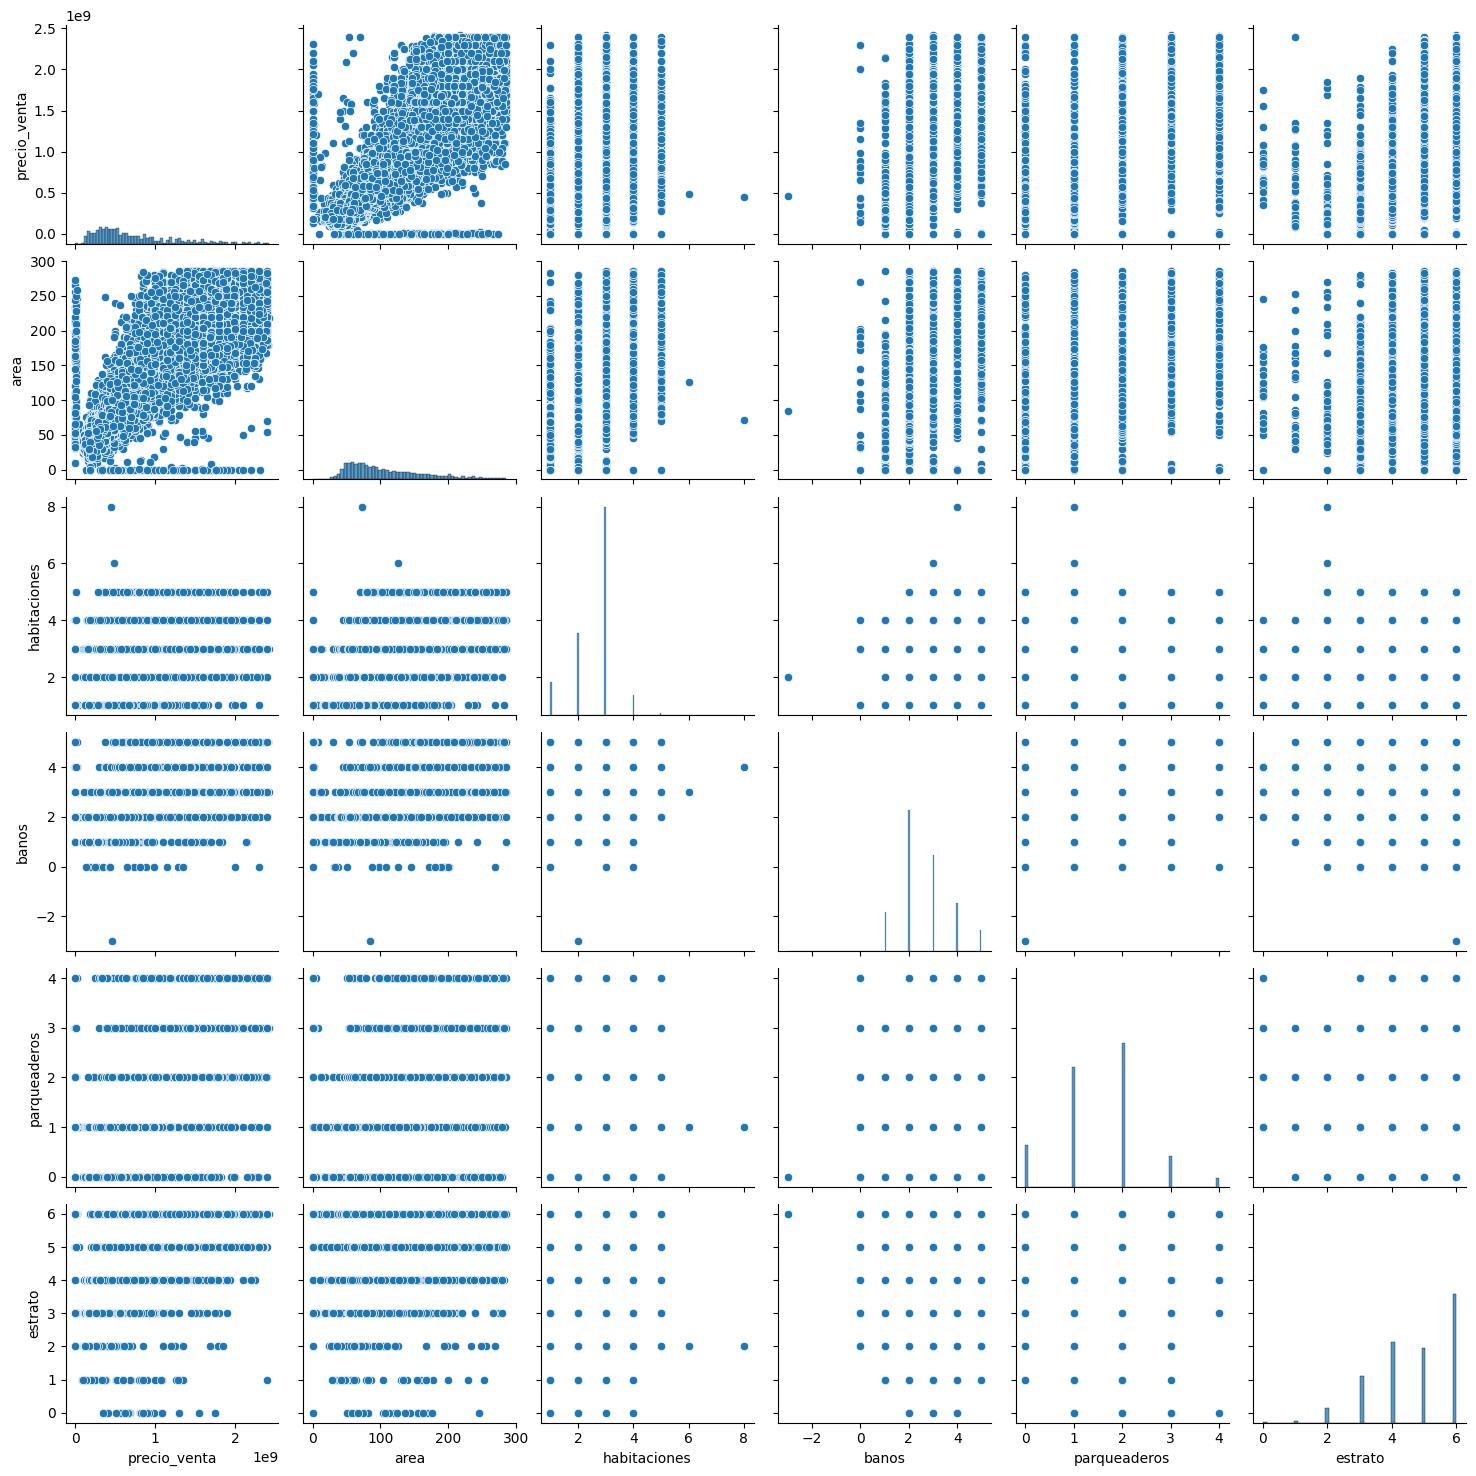

In [35]:
## Graficamos para observar la relación entre estas variables

sns.pairplot(model)
plt.show()

#<font color="#3D2FB2 " FACE="futura" size =6>  Modelos

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [37]:
X = model[['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', ]]
y = model['precio_venta']

In [38]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [47]:
def generate_model_report(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_y = r2_score(y_test, y_pred)
    r2_x = r2_score(y_train, y_pred_train)

    print(f'RMSE test: {rmse_test}')
    print(f'RMSE train: {rmse_x}')
    print(f'R2 Score test: {r2_y}')
    print(f'R2 Score train {r2_x}')

    plt.scatter(y_pred, y_pred, c='b', label='Valores Predichos')  # Valores predichos en azul
    plt.scatter(y_test, y_test, c='r', label='Valores Actuales')   # Valores actuales en rojo

    plt.xlabel('Valores Actuales')
    plt.ylabel('Valores Predichos')
    plt.title('Valores Predichos vs. Valores Actuales')

    plt.legend()  
    plt.show()
    
    

#<font color="#3D2FB2 " FACE="futura" size =6> Primer modelo: Random Forest Regressor

In [40]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra,
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo RandomForestRegressor
rf_model = RandomForestRegressor(
            n_estimators = 200,                   #número de árboles incluidos en el modelo.
            criterion    = 'squared_error',       #métrica para dividir
            max_depth    = None,
            max_features = 'auto',                #
            oob_score    = False,
            n_jobs       = -1,
            random_state = 42
         )


rf_model.fit(X_train, y_train)

InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [ ]:
generate_model_report(rf_model)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#<font color="#3D2FB2 " FACE="futura" size =5> Kfold: Random Forest Regressor

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
X1 = model[['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', ]]
y1 = model['precio_venta']

In [ ]:
# Convertir DataFrame y Serie de Pandas a matrices NumPy
X1 = X.to_numpy()
y1 = y.to_numpy()

In [ ]:
# Especifica el número de pliegues (K) que deseas utilizar
num_folds = 5

In [ ]:
# Inicializa el modelo de Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
# Inicializa el validador K-fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Listas para almacenar las métricas de evaluación en cada iteración
# mse_scores = []
r2_sc = []

# Itera a través de los pliegues
for train_index, test_index in kf.split(X):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    # Entrena el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    ## Cálculo del eficiencia del modelo en cada una de las particiones
    r2s = r2_score(y_test, y_pred)
    r2_sc.append(r2s)

print(r2_sc)


Observamos que en cada una de las particiones el modelo se comporta de la misma manera, por lo que la exactitud en el modelo se mantiene en el mismo rango.

#<font color="#3D2FB2 " FACE="futura" size =6> Segundo modelo: SDG Regressor

In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings

In [42]:
rf_model = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
rf_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [46]:
y_pred.shape

NameError: name 'y_pred' is not defined

RMSE test: 224828640.7521642
RMSE train: 222959467.3916971
R2 Score test: 0.794978332375924
R2 Score train 0.8001128561621034


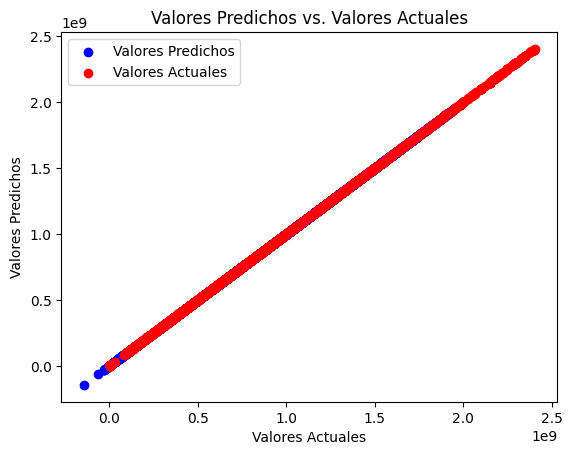

In [48]:
generate_model_report(rf_model)

#<font color="#3D2FB2 " FACE="futura" size =6> Tercer modelo: Ordinary least squares

In [ ]:
!pip install statsmodels

In [50]:
import statsmodels.api as sm

In [51]:
rf_model = sm.OLS(y_train, X_train).fit()


RMSE test: 229246261.79968345
RMSE train: 226999033.34367105
R2 Score test: 0.7868423041078115
R2 Score train 0.7928041552494802


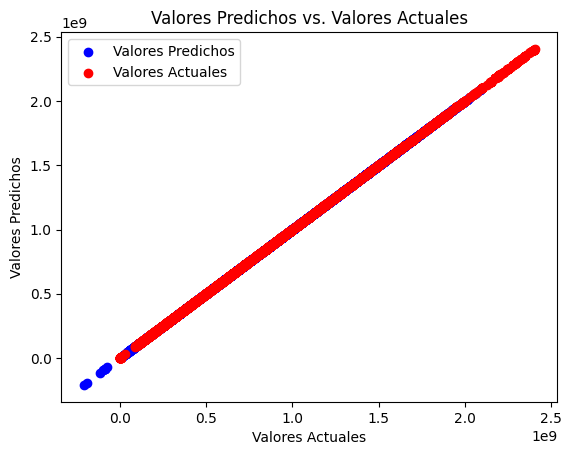

In [52]:
generate_model_report(rf_model)

#<font color="#3D2FB2 " FACE="futura" size =6> Cuarto modelo: GradientBoostingRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
rf_model = GradientBoostingRegressor(random_state=0)
rf_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

RMSE test: 209643443.36137962
RMSE train: 205061517.19318387
R2 Score test: 0.8217378826797179
R2 Score train 0.8309164496163454


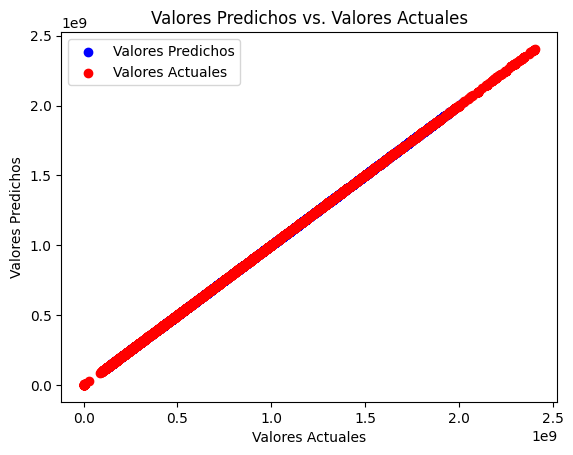

In [54]:
generate_model_report(rf_model)

#<font color="#3D2FB2 " FACE="futura" size =6> Quinto modelo: Linear regresion

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
rf_model = LinearRegression()
rf_model.fit(X_train, y_train)


LinearRegression()

RMSE test: 224254944.0515586
RMSE train: 222357308.97782785
R2 Score test: 0.7960233076752702
R2 Score train 0.8011910897133043


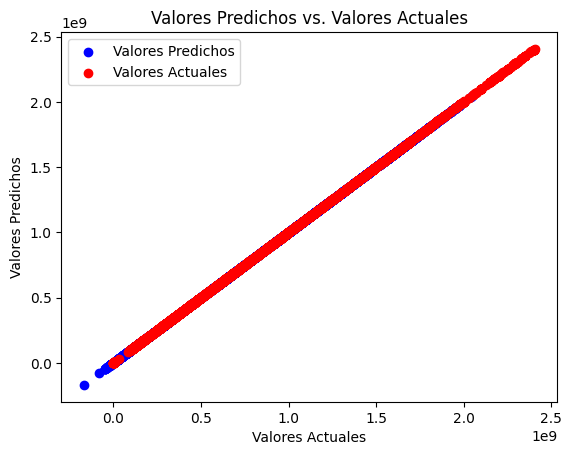

In [57]:
# Realizar predicciones en el conjunto de prueba
generate_model_report(rf_model)